In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.decomposition import PCA

In [2]:
from sklearn.preprocessing import StandardScaler

https://archive.ics.uci.edu/ml/datasets/seeds

# PCA


<img src="Grafika/pca1.png" width="740">

<img src="Grafika/pca2.png" width="400">

Źródło: https://medium.com/@aptrishu/understanding-principle-component-analysis-e32be0253ef0

<img src="Grafika/PCA.png" width="800">

Źródło: https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/

Algorytm (w skrócie):
1. Od każdej kolumny w danych odejmij jej średnią (centrowanie)
2. Oblicz macierz kowariancji.
3. Dla macierzy kowariancji oblicz jej wartości własne i odpowiadające im wektory własne. Każdy wektor własny ma rozmiar $m$ - czyli ilość cech.
4. 'Ułóż' wektory w kolejności od największej odpowiadającej im wartości własnej.
5. Wybierz pierwsze *k*, gdzie *k* to ilość żądanych cech. W ten sposób otrzymujemy macierz $W$ ($m \times k $)
6. Przeskaluj wejściowe dane mnożąc je przez macierz $W$.

In [12]:
samples = np.loadtxt("Dane/seeds_dataset.txt")
grains = samples[:,[4,3]]

In [13]:
grains[:5,:]

array([[ 3.312,  5.763],
       [ 3.333,  5.554],
       [ 3.337,  5.291],
       [ 3.379,  5.324],
       [ 3.562,  5.658]])

In [14]:
width,height = grains[:,0],grains[:,1]

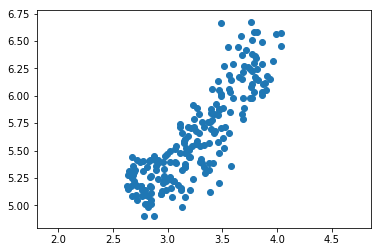

In [15]:
plt.scatter(width,height)
plt.axis('equal')
plt.show()

In [16]:
correlation,pvalue = pearsonr(width,height)

In [17]:
print(correlation)
print(pvalue)

0.860414937714
8.12133290619e-63


In [82]:
pca = PCA()
pca.fit(grains)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [83]:
pca.mean_

array([ 3.26,  5.63])

In [84]:
np.set_printoptions(2,suppress=True)

In [85]:
pca.components_

array([[ 0.64,  0.77],
       [-0.77,  0.64]])

In [86]:
first_pc = pca.components_[0]
second_pc = pca.components_[1]

### WIzualization of eigenvectors

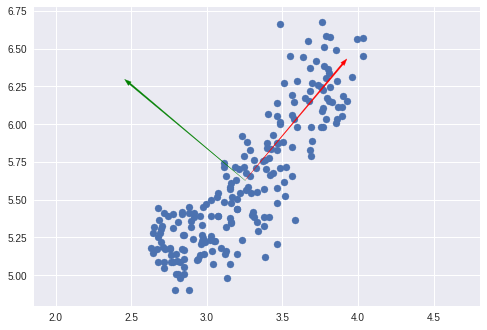

In [89]:
plt.scatter(width,height)
plt.axis('equal')
plt.arrow(pca.mean_[0],pca.mean_[1],first_pc[0],first_pc[1],color='red',width=0.01)
plt.arrow(pca.mean_[0],pca.mean_[1],second_pc[0],second_pc[1],color='green',width=0.01)
plt.show()

In [19]:
pca_features = pca.transform(grains)

In [20]:
xs = pca_features[:,0]
ys = pca_features[:,1]

### Wizualization of dataset transformed to transformed coordinates

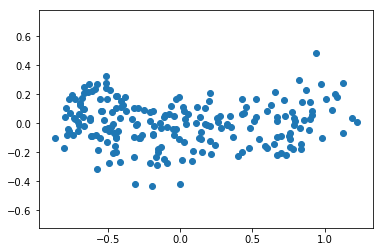

In [21]:
plt.scatter(xs,ys)
plt.axis('equal')
plt.show()

In [26]:
print(np.dot(grains - pca.mean_,pca.components_.T)[:5])

[[ 0.14  0.04]
 [-0.01 -0.1 ]
 [-0.21 -0.28]
 [-0.16 -0.29]
 [ 0.22 -0.21]]


In [27]:
print(pca_features[:5])

[[ 0.14  0.04]
 [-0.01 -0.1 ]
 [-0.21 -0.28]
 [-0.16 -0.29]
 [ 0.22 -0.21]]


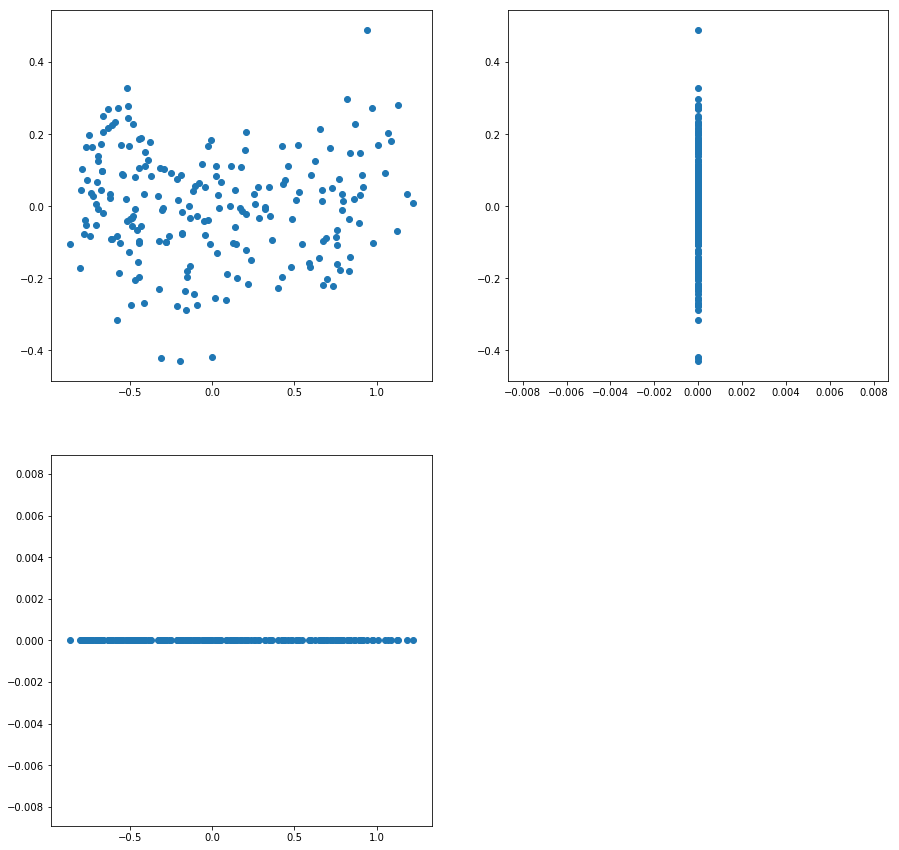

In [28]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.scatter(xs,ys)

plt.subplot(2,2,2)
plt.scatter(np.zeros_like(ys),ys)

plt.subplot(2,2,3)
plt.scatter(xs,np.zeros_like(xs))

plt.show()

In [30]:
pca.explained_variance_ratio_

array([ 0.93,  0.07])

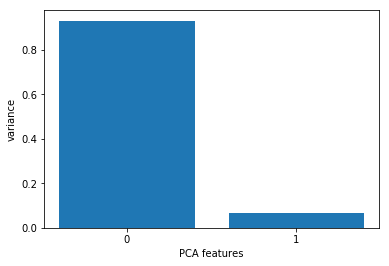

In [31]:
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('variance')
plt.xticks(range(pca.n_components_))
plt.show()

In [28]:
s = np.diag([1.]*5)
s[[0,1,3,4],[1,0,4,3]]=0.98

In [29]:
s

array([[ 1.  ,  0.98,  0.  ,  0.  ,  0.  ],
       [ 0.98,  1.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  1.  ,  0.98],
       [ 0.  ,  0.  ,  0.  ,  0.98,  1.  ]])

In [32]:
x = np.random.multivariate_normal([0]*5,s,200)# dwie z pięciu cech silnie skorelowane

In [33]:
pca = PCA()

In [34]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [35]:
pca.explained_variance_ratio_

array([ 0.44,  0.38,  0.17,  0.  ,  0.  ])

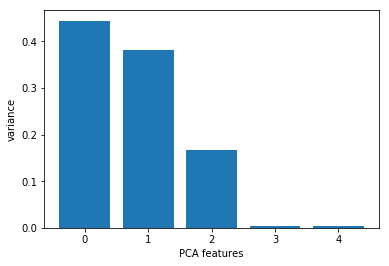

In [36]:
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('variance')
plt.xticks(range(pca.n_components_))
plt.show()

In [37]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

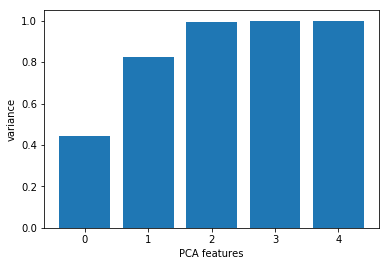

In [38]:
plt.bar(range(pca.n_components_),cumsum)
plt.xlabel('PCA features')
plt.ylabel('variance')
plt.xticks(range(pca.n_components_))
plt.show()

### Dane w nowej przestrzeni

In [39]:
pca.transform(x)[:10]

array([[-0.59, -1.  ,  0.23, -0.04,  0.03],
       [ 0.43, -1.56,  0.59, -0.11,  0.12],
       [ 3.02, -0.28,  0.27,  0.07,  0.28],
       [-1.22,  0.56,  0.48,  0.25, -0.22],
       [-0.03,  0.51,  0.41,  0.07,  0.24],
       [-1.72,  2.81, -0.63, -0.  ,  0.04],
       [-2.1 ,  0.53, -0.5 ,  0.03,  0.01],
       [-2.66, -0.79, -0.06,  0.05, -0.05],
       [-0.87,  1.83,  0.75, -0.05,  0.19],
       [ 0.42,  0.08,  1.39,  0.19, -0.09]])

### Dane ryby

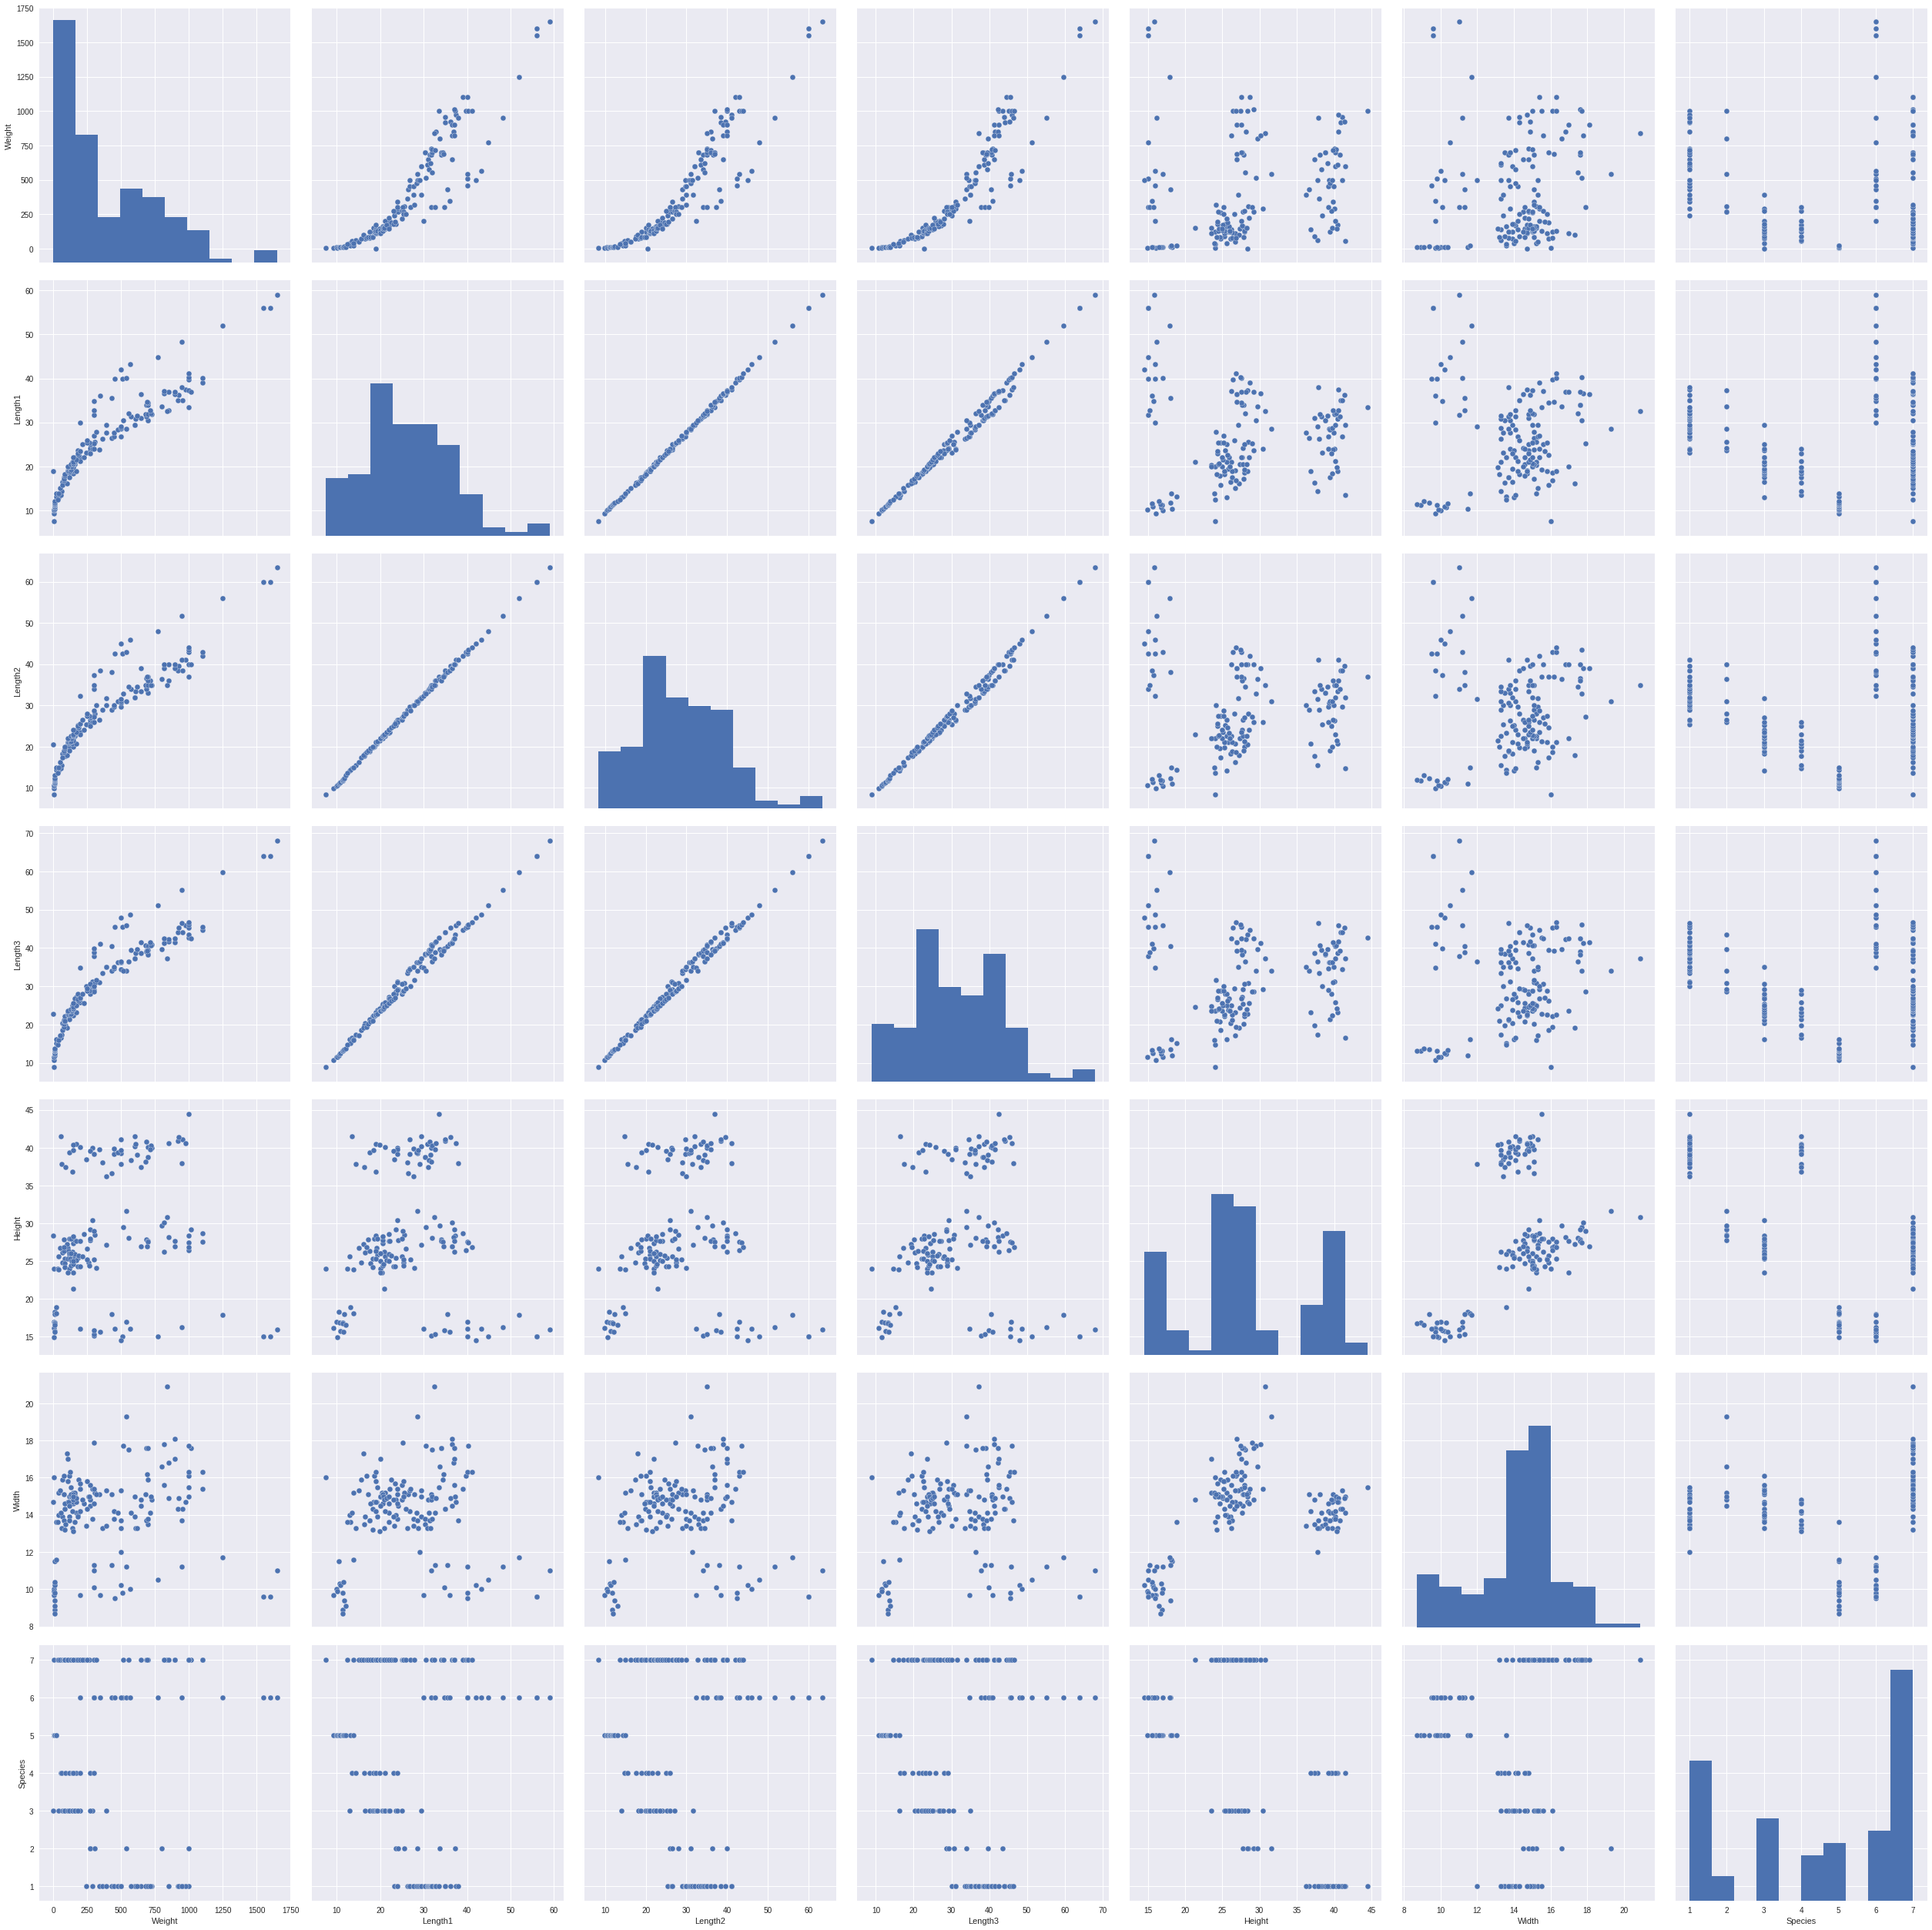

In [40]:
import pandas as pd
samples = pd.read_csv("Dane/fish.csv", sep=";",decimal=",")

import seaborn as sns
sns.pairplot(data=samples, size=5)
plt.show()

In [41]:
spacies = samples.iloc[:,-1]

In [42]:
samples = samples.iloc[:,:-1]

In [43]:
samples.shape

(158, 6)

In [44]:
samples.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1


In [45]:
samples.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,398.695570,26.226582,28.393038,31.188608,28.256329,14.119620
std,359.086204,10.024844,10.746572,11.637010,8.296377,2.281229
min,0.000000,7.500000,8.400000,8.800000,14.500000,8.700000
25%,120.000000,19.025000,21.000000,23.125000,24.225000,13.400000
50%,272.500000,25.100000,27.150000,29.350000,27.000000,14.600000
75%,650.000000,32.700000,35.750000,39.675000,37.700000,15.300000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,20.900000


In [46]:
scaler = StandardScaler()

In [47]:
samples_scaled = scaler.fit_transform(samples)

In [90]:
pca = PCA()

In [91]:
pca.fit(samples_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [92]:
pca.explained_variance_ratio_

array([ 0.65,  0.24,  0.09,  0.02,  0.  ,  0.  ])

In [93]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

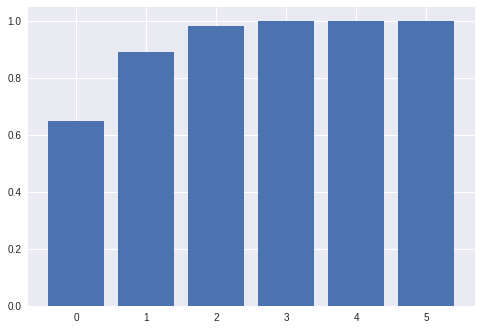

In [94]:
plt.bar(range(pca.n_components_),cumsum)
plt.show()

In [95]:
pca.components_# kierunki to wiersze

array([[ 0.49,  0.5 ,  0.5 ,  0.5 ,  0.08,  0.05],
       [-0.04,  0.1 ,  0.08,  0.05, -0.7 , -0.7 ],
       [-0.02,  0.06,  0.05, -0.06, -0.7 ,  0.71],
       [-0.87,  0.27,  0.27,  0.28,  0.1 ,  0.05],
       [-0.  ,  0.5 ,  0.3 , -0.81,  0.09, -0.04],
       [-0.  ,  0.65, -0.76,  0.11,  0.  ,  0.01]])

### Dimension reduction for visualisation in 2D

In [96]:
pca2 = PCA(2)

In [97]:
samples_pca = pca2.fit_transform(samples_scaled)

In [98]:
pca2.components_

array([[ 0.49,  0.5 ,  0.5 ,  0.5 ,  0.08,  0.05],
       [-0.04,  0.1 ,  0.08,  0.05, -0.7 , -0.7 ]])

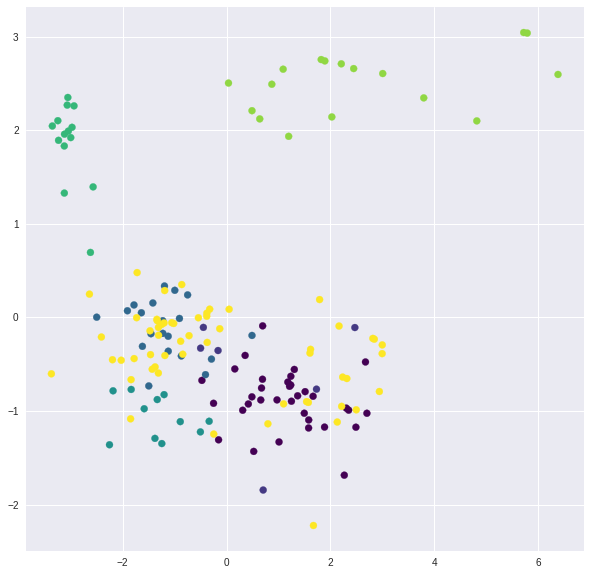

In [100]:
plt.viridis()
plt.figure(figsize=(10,10))
plt.scatter(samples_pca[:,0],samples_pca[:,1],c = spacies)
plt.show();

### Food txt

In [186]:
data = pd.read_csv("Dane/food.txt",delimiter=" ",comment="#")

In [187]:
data.head(100)

,food,England,Wales,Scotland,Ireland
0,Cheese,105,103,103,66
1,Carcass-meat,245,227,242,267
2,Other-meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats-and-oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh-potatoes,720,874,566,1033
7,Fresh-Veg,253,265,171,143
8,Other-Veg,488,570,418,355
9,Processed-potatoes,198,203,220,187


In [188]:
data.shape

(17, 5)

In [189]:
data = data.set_index("food")

In [190]:
data = data.T

In [191]:
data.head()

food,Cheese,Carcass-meat,Other-meat,Fish,Fats-and-oils,Sugars,Fresh-potatoes,Fresh-Veg,Other-Veg,Processed-potatoes,Processed-Veg,Fresh-fruit,Cereals,Beverages,Soft-drinks,Alcoholic-drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [192]:
data.shape

(4, 17)

In [193]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [194]:
pca = PCA()

In [195]:
pca.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [196]:
pca.n_components_

17

### 4 componenty w 100% objasniaja zmiennosc czterech obserwacje !

In [197]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([ 0.68,  0.93,  1.  ,  1.  ])

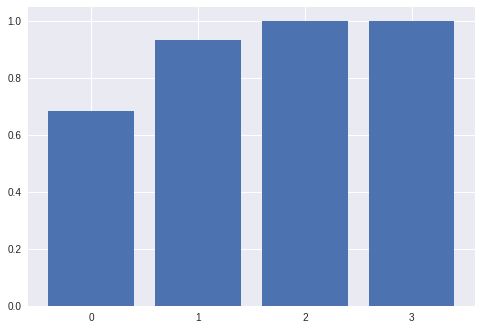

In [198]:
plt.bar(range(len(cumsum)),cumsum)
plt.xticks(range(len(cumsum)))
plt.show()

In [199]:
pca_data = pca.transform(data_scaled)

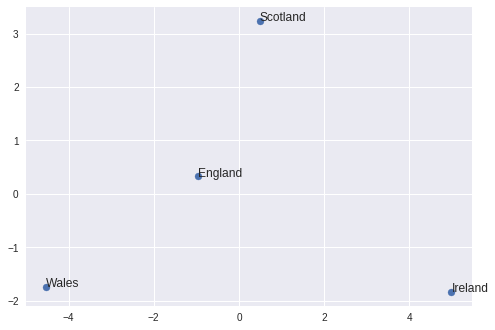

In [200]:
plt.scatter(pca_data[:,0],pca_data[:,1])
for i in range(4):
    plt.annotate(data.index[i],(pca_data[i,0],pca_data[i,1]))
plt.show()

In [201]:
pca.components_

array([[-0.25,  0.29, -0.26, -0.29, -0.13, -0.28,  0.1 , -0.27, -0.29,
        -0.12, -0.26, -0.28, -0.18, -0.28,  0.23, -0.26, -0.25],
       [ 0.25, -0.08,  0.14, -0.01, -0.4 , -0.14, -0.45, -0.1 , -0.09,
         0.41, -0.15,  0.08, -0.33, -0.14,  0.29,  0.23,  0.21],
       [ 0.19,  0.15, -0.3 ,  0.2 , -0.34, -0.05, -0.11,  0.35,  0.07,
        -0.32,  0.33,  0.24, -0.39, -0.15, -0.17, -0.12, -0.25],
       [ 0.02, -0.77, -0.52, -0.17, -0.18,  0.1 ,  0.03,  0.06,  0.07,
         0.02, -0.04, -0.14,  0.13, -0.04,  0.08, -0.06, -0.04]])

In [202]:
pca.components_.shape

(4, 17)

In [203]:
fc_food = pca.components_[0]# pierwsza cecha ukryta kombinacją liniową cech wejściowych
fc_indices = np.argsort(pca.components_[0])
print(fc_food[np.argsort(pca.components_[0])])
print(data.columns[fc_indices])

[-0.29 -0.29 -0.28 -0.28 -0.28 -0.27 -0.26 -0.26 -0.26 -0.25 -0.25 -0.18
 -0.13 -0.12  0.1   0.23  0.29]
Index(['Other-Veg', 'Fish', 'Sugars', 'Fresh-fruit', 'Beverages', 'Fresh-Veg',
       'Other-meat', 'Processed-Veg', 'Alcoholic-drinks', 'Confectionery',
       'Cheese', 'Cereals', 'Fats-and-oils', 'Processed-potatoes',
       'Fresh-potatoes', 'Soft-drinks', 'Carcass-meat'],
      dtype='object', name='food')


In [204]:
fc_food = pca.components_[1]
fc_indices = np.argsort(pca.components_[1])
print(fc_food[np.argsort(pca.components_[1])])
print(data.columns[fc_indices])

[-0.45 -0.4  -0.33 -0.15 -0.14 -0.14 -0.1  -0.09 -0.08 -0.01  0.08  0.14
  0.21  0.23  0.25  0.29  0.41]
Index(['Fresh-potatoes', 'Fats-and-oils', 'Cereals', 'Processed-Veg',
       'Beverages', 'Sugars', 'Fresh-Veg', 'Other-Veg', 'Carcass-meat', 'Fish',
       'Fresh-fruit', 'Other-meat', 'Confectionery', 'Alcoholic-drinks',
       'Cheese', 'Soft-drinks', 'Processed-potatoes'],
      dtype='object', name='food')


### Miasta

In [205]:
data = pd.read_csv("Dane/places.txt",sep="\s+",header=0)
data = data.iloc[:,range(9)]
data.head()

,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ
"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633
"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727


In [206]:
data.shape

(329, 9)

In [207]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [208]:
pca = PCA()
pca.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [223]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([ 0.38,  0.51,  0.64,  0.74,  0.83,  0.9 ,  0.95,  0.99,  1.  ])

In [210]:
pca.n_components_

9

In [211]:
data.columns

Index(['Climate', 'HousingCost', 'HlthCare', 'Crime', 'Transp', 'Educ', 'Arts',
       'Recreat', 'Econ'],
      dtype='object')

In [212]:
pca.components_

array([[ 0.21,  0.36,  0.46,  0.28,  0.35,  0.28,  0.46,  0.33,  0.14],
       [ 0.22,  0.25, -0.3 ,  0.36, -0.18, -0.48, -0.19,  0.38,  0.47],
       [ 0.69,  0.21,  0.01, -0.19, -0.15, -0.23,  0.03,  0.05, -0.61],
       [ 0.14,  0.51,  0.01, -0.54, -0.3 ,  0.34, -0.1 , -0.19,  0.42],
       [-0.37,  0.23, -0.1 , -0.52,  0.4 , -0.21, -0.11,  0.53, -0.16],
       [-0.37,  0.14,  0.37, -0.08, -0.47, -0.5 ,  0.46, -0.09, -0.03],
       [-0.08, -0.23,  0.01,  0.02, -0.58,  0.43, -0.02,  0.63, -0.15],
       [-0.36,  0.61, -0.19,  0.43, -0.09,  0.19, -0.2 , -0.15, -0.4 ],
       [ 0.  ,  0.01, -0.72, -0.06,  0.  ,  0.11,  0.69, -0.03,  0.  ]])

In [213]:
pca4 = PCA(4)
pca4.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [214]:
pca4.components_

array([[ 0.21,  0.36,  0.46,  0.28,  0.35,  0.28,  0.46,  0.33,  0.14],
       [ 0.22,  0.25, -0.3 ,  0.36, -0.18, -0.48, -0.19,  0.38,  0.47],
       [ 0.69,  0.21,  0.01, -0.19, -0.15, -0.23,  0.03,  0.05, -0.61],
       [ 0.14,  0.51,  0.01, -0.54, -0.3 ,  0.34, -0.1 , -0.19,  0.42]])

In [215]:
pca4.components_.shape

(4, 9)

In [216]:
data.columns.shape

(9,)

In [219]:
feature0 = pca4.components_[0]
ind0 = np.argsort(feature0)
print(pca4.explained_variance_ratio_[0])
print(feature0[ind0])
print(data.columns[ind0])

0.378699088959
[ 0.14  0.21  0.28  0.28  0.33  0.35  0.36  0.46  0.46]
Index(['Econ', 'Climate', 'Educ', 'Crime', 'Recreat', 'Transp', 'HousingCost',
       'HlthCare', 'Arts'],
      dtype='object')


In [224]:
feature1 = pca4.components_[1]
ind1 = np.argsort(feature1)
print(cumsum[1])
print(feature1[ind1])
print(data.columns[ind1])

0.51358532966
[-0.48 -0.3  -0.19 -0.18  0.22  0.25  0.36  0.38  0.47]
Index(['Educ', 'HlthCare', 'Arts', 'Transp', 'Climate', 'HousingCost', 'Crime',
       'Recreat', 'Econ'],
      dtype='object')


In [179]:
pca2 = PCA(2)

In [225]:
pca2.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [226]:
pca_data = pca2.transform(data_scaled)

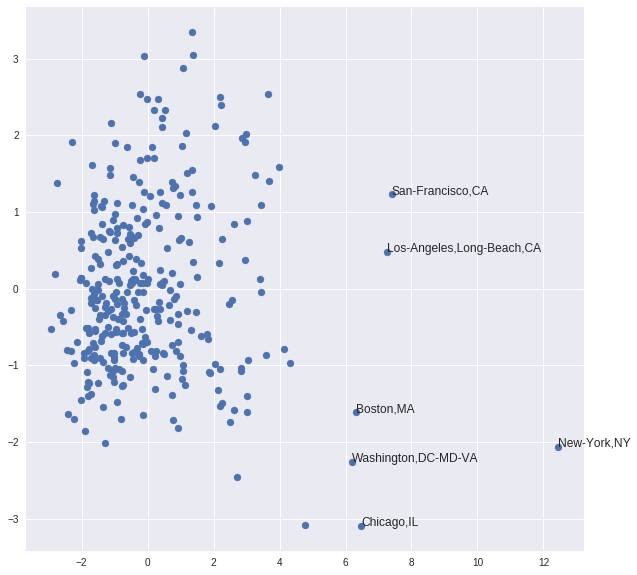

In [200]:
plt.viridis()
plt.figure(figsize=(10,10))
plt.scatter(pca_data[:,0],pca_data[:,1])
indices = []
for i in range(len(pca_data[:,0])):
    if pca_data[i,0] > 5:
        indices.append(i)
        plt.annotate(data.index[i],(pca_data[i,0],pca_data[i,1]))
plt.show();

In [201]:
k = 0
order = np.argsort(pca.components_[k])
print(pca.components_[k][order])
print(data.columns[order])

[ 0.14  0.21  0.28  0.28  0.33  0.35  0.36  0.46  0.46]
Index(['Econ', 'Climate', 'Educ', 'Crime', 'Recreat', 'Transp', 'HousingCost',
       'HlthCare', 'Arts'],
      dtype='object')


In [202]:
k = 1
order = np.argsort(pca.components_[k])
print(pca.components_[k][order])
print(data.columns[order])

[-0.48 -0.3  -0.19 -0.18  0.22  0.25  0.36  0.38  0.47]
Index(['Educ', 'HlthCare', 'Arts', 'Transp', 'Climate', 'HousingCost', 'Crime',
       'Recreat', 'Econ'],
      dtype='object')


### Longley - comparison of linear regression with and without PCA

In [204]:
df = pd.read_csv('Dane/longley.csv',index_col=0)
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [206]:
X = df.iloc[:,:5]
y = df.iloc[:,-1]

In [232]:
from sklearn.linear_model import LinearRegression

In [233]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [217]:
lm = LinearRegression()

In [213]:
scores = cross_val_score(estimator=lm,X=X,y=y,scoring='neg_mean_squared_error',cv=16)
np.mean(scores)

-0.36580668330211075

In [214]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X=X)

In [215]:
pca = PCA()
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [219]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([ 0.72,  0.96,  1.  ,  1.  ,  1.  ])

In [222]:
pca3 = PCA(3)
X_pca3 = pca3.fit_transform(X_scaled)

In [223]:
scores = cross_val_score(estimator=lm,X=X_pca3,y=y,scoring='neg_mean_squared_error',cv=16)
np.mean(scores)

-0.30593378689493145

### Yarn - comparison of lasso regression and linear regression with dimension reduction 

In [240]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,LeaveOneOut

In [228]:
df = pd.read_csv("Dane/yarn.csv",index_col=0)
df.shape

(28, 270)

In [229]:
df.columns

Index(['NIR.1', 'NIR.2', 'NIR.3', 'NIR.4', 'NIR.5', 'NIR.6', 'NIR.7', 'NIR.8',
       'NIR.9', 'NIR.10',
       ...
       'NIR.261', 'NIR.262', 'NIR.263', 'NIR.264', 'NIR.265', 'NIR.266',
       'NIR.267', 'NIR.268', 'density', 'train'],
      dtype='object', length=270)

In [236]:
X = df.iloc[:,:268]
y = df.iloc[:,268]

In [237]:
pipe1 = Pipeline([
    ('scaler',StandardScaler()),
    ('lasso',Lasso(alpha=0.1))
])

In [247]:
param1 = {'lasso__alpha':[0.1,1.0,10.0]}

In [251]:
grid_lasso = GridSearchCV(estimator=pipe1,
                         param_grid=param1,
                         cv=LeaveOneOut(),
                         scoring = 'neg_mean_squared_error')
grid_lasso.fit(X,y)

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

GridSearchCV(cv=LeaveOneOut(), error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'lasso__alpha': [0.1, 1.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [252]:
grid_lasso.best_score_

-0.35261541229973209

In [253]:
grid_lasso.best_params_

{'lasso__alpha': 0.1}

In [254]:
pipe2 = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=2)),
    ('lm',LinearRegression())
])

In [255]:
param2 = {'pca__n_components':range(3,26)}

In [314]:
grid_pca = GridSearchCV(estimator=pipe2,
                       param_grid=param2,
                       cv=LeaveOneOut(),
                       scoring='neg_mean_squared_error',
                       return_train_score=True)
grid_pca.fit(X,y)

GridSearchCV(cv=LeaveOneOut(), error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('lm', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'pca__n_components': range(3, 26)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [315]:
grid_pca.best_score_

-0.047081762744490781

In [316]:
grid_pca.best_params_

{'pca__n_components': 19}

In [317]:
best_model = grid_pca.best_estimator_
pca_best = best_model.steps[1][1]

In [318]:
np.cumsum(pca_best.explained_variance_ratio_)

array([ 0.51,  0.82,  0.98,  0.99,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
        1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ])

In [319]:
pca_best.components_.shape

(19, 268)

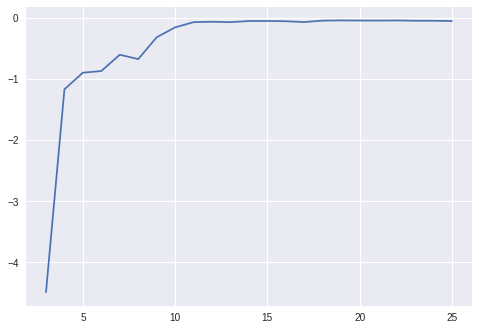

In [323]:
plt.plot(range(3,26),grid_pca.cv_results_["mean_test_score"])
plt.show() # widzimy, że 10 składowych daje rade